## Example Analysis of whales clicks
This notebook is an example for how the whale click dataset can be analyzed.

In [23]:
sc.stop()

In [1]:
from pyspark import SparkContext
sc = SparkContext(master=master_url)

from pyspark.sql import Row, SQLContext,DataFrame
from pyspark.sql.types import *

sqlContext = SQLContext(sc)

%pylab inline

#!pip install pandas
#!pip install scipy

import pandas as pd
import datetime as dt

from scipy.io import loadmat,savemat,whosmat

from string import split
from collections import Counter
import re
import numpy as np
from numpy import shape

from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('lib')
import spark_PCA
import parse

('time', 'datetime'),
('species', 'str'),
('site', 'str'),
('rec_no', 'str'),
('bout_i', 'int'),
('peak2peak', 'float'),
('MSN', 'array,202'),
('MSP', 'array,101'),
('TPWS1', 'bool'),
('MD1', 'bool'),
('FD1', 'bool'),
('TPWS2', 'bool'),
('MD2', 'bool'),
('FD2', 'bool'),
('TPWS3', 'bool'),
('MD3', 'bool'),
('FD3', 'bool'),
('time', 'datetime') {'start': 0, 'parser': <function parse_date at 0x7f3e2ee27668>, 'end': 1, 'name': 'time'}
('species', 'str') {'start': 1, 'parser': <function parse_string at 0x7f3e247b3ed8>, 'end': 2, 'name': 'species'}
('site', 'str') {'start': 2, 'parser': <function parse_string at 0x7f3e247b3ed8>, 'end': 3, 'name': 'site'}
('rec_no', 'str') {'start': 3, 'parser': <function parse_string at 0x7f3e247b3ed8>, 'end': 4, 'name': 'rec_no'}
('bout_i', 'int') {'start': 4, 'parser': <function parse_int at 0x7f3e247b3de8>, 'end': 5, 'name': 'bout_i'}
('peak2peak', 'float') {'start': 5, 'parser': <function parse_float at 0x7f3e247b3e60>, 'end': 6, 'name': 'peak2peak'}
('M

In [6]:
# load data into a dataframe called df
from pyspark.sql import DataFrame
CVS_Data=sc.textFile("/CVS/")
row=CVS_Data.first()
#row

u'2010-08-09 07:01:15.000002,Cuviers,DT,01,0,45.9858,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,123.1518,75.2794,-33.2284,-23.9326,-76.0488,-52.1295,-66.5504,-37.8580,-30.1298,2.2544,20.0773,19.0220,39.8708,36.0729,39.3590,28.7682,39.1766,18.8269,16.5995,-2.7279,-4.6016,-17.2059,-16.9708,-16.5006,-13.6036,-21.0872,-22.0780,-22.2508,-1

In [11]:
from parse import parse
parse(row)


Row(time=datetime.datetime(2010, 8, 9, 7, 1, 15, 2), species=u'Cuviers', site=u'DT', rec_no=u'01', bout_i=0, peak2peak=45.9858, MSN=bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
RDD=CVS_Data.map(parse)
RDD.first()

In [ ]:
df=sqlContext.createDataFrame(RDD)

t0=time()
print df.cache().count()
print time()-t0

t0=time()
print df.count()
time()-t0

In [ ]:
RDD.first()

In [111]:
spectra=df.map(lambda row:unpackArray(row.MSP,data_type=np.float64))

In [115]:
from time import time
t0=time()
COV=computeCov(spectra)
print time()-t0

shape of E= (101,) shape of NE= (101,)
588.099251032


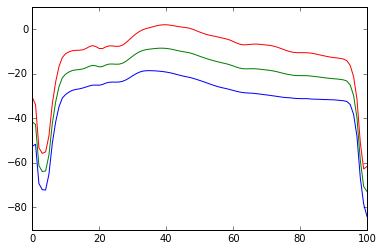

In [123]:
M=COV['Mean']
S=np.sqrt(COV['Var'])
plot(M-S)
plot(M)
plot(M+S)

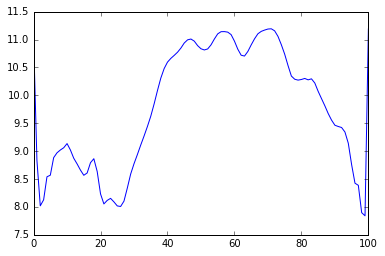

In [121]:
plot(np.sqrt(COV['Var']))

In [124]:
eigval,eigvec=LA.eig(COV['Cov'])

In [127]:
eigval=eigval/sum(eigval)
sum(eigval)

1.0000000000000002

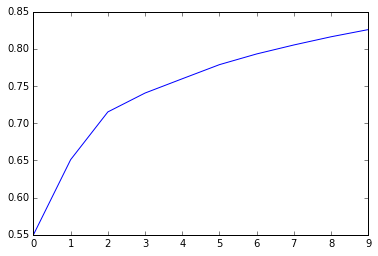

In [129]:
plot(cumsum(eigval[:10]))

In [131]:
shape(eigvec)

(101, 101)

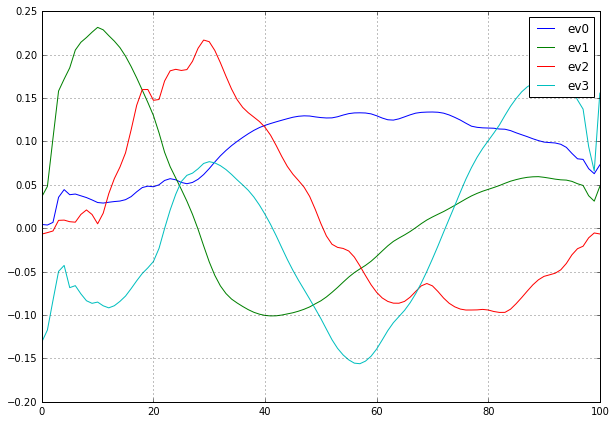

In [143]:
figure(figsize=[10,7])
for i in range(4):
    plot(eigvec[:,i],label='ev'+str(i))
legend()
grid()

In [136]:
sum(eigvec[:,1]**2)

1.0000000000000002

In [194]:
#Cuviers=df.filter(df.species==u'Cuviers' & df.TPWS2==1)
Cuviers=df.filter(df.TPWS2==1).filter(df.species==u'Cuviers')

In [195]:
Gervais=df.filter(df.TPWS2==1).filter(df.species==u'Gervais')

In [206]:
V=eigvec[:,1:3] #vectors on which to project
def project(row):
    X=unpackArray(row.MSP,data_type=np.float64)
    return np.dot(X,V)

In [212]:
Cuvier_projections=np.array(Cuviers.sample(False,0.001).map(project).take(10000))
Gervais_projections=np.array(Gervais.sample(False,0.001).map(project).take(10000))

(-50, 50)

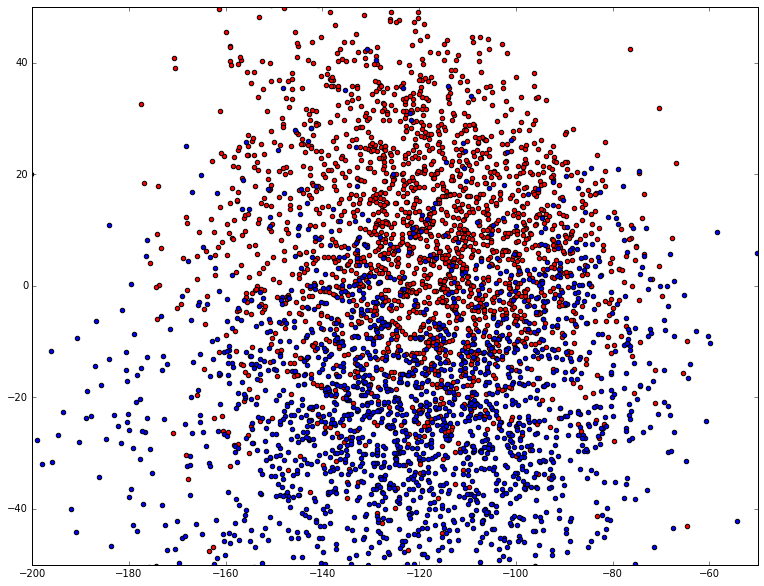

In [213]:
figure(figsize=[13,10])
scatter(Cuvier_projections[:,0],Cuvier_projections[:,1],c='r')
scatter(Gervais_projections[:,0],Gervais_projections[:,1],c='b')
xlim([-200,-50])
ylim([-50,50])

In [190]:
df

DataFrame[time: timestamp, species: string, site: string, rec_no: string, bout_i: bigint, peak2peak: double, MSN: binary, MSP: binary, TPWS1: bigint, MD1: bigint, FD1: bigint, TPWS2: bigint, MD2: bigint, FD2: bigint, TPWS3: bigint, MD3: bigint, FD3: bigint]